In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from numpy import nan

In [2]:
df2 = pd.read_csv('Desktop/data-describe/sensor.csv', index_col=0)
del df2['sensor_15']
df = df2.drop(columns=['timestamp','machine_status'])
df.fillna(df.mean(), inplace=True)

In [3]:
df

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.31940,203.7037
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.45140,203.1250
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.18750,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,183.04926,231.1921
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,183.04926,231.1921
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,183.04926,232.0602
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,183.04926,234.0856


In [4]:
#Scale data for better approximations
# df = np.exp(df)

<ipython-input-4-cffe3b4851c9>:2: RuntimeWarning: overflow encountered in exp
  df = np.exp(df)


In [5]:
df.insert(0,"timestamp",df2['timestamp'])
df.insert(1,"machine_status",df2['machine_status'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp']

0        2018-04-01 00:00:00
1        2018-04-01 00:01:00
2        2018-04-01 00:02:00
3        2018-04-01 00:03:00
4        2018-04-01 00:04:00
                 ...        
220315   2018-08-31 23:55:00
220316   2018-08-31 23:56:00
220317   2018-08-31 23:57:00
220318   2018-08-31 23:58:00
220319   2018-08-31 23:59:00
Name: timestamp, Length: 220320, dtype: datetime64[ns]

In [6]:
m = np.mean(df['sensor_04'])
set = (df['sensor_04'] - m)
sd = np.std(df['sensor_04'])
nor = set/sd
nor
df2['nor'] = nor
df2

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,nor
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,NaN
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,NaN
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,NaN
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,NaN
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL,NaN
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL,NaN
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL,NaN
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL,NaN


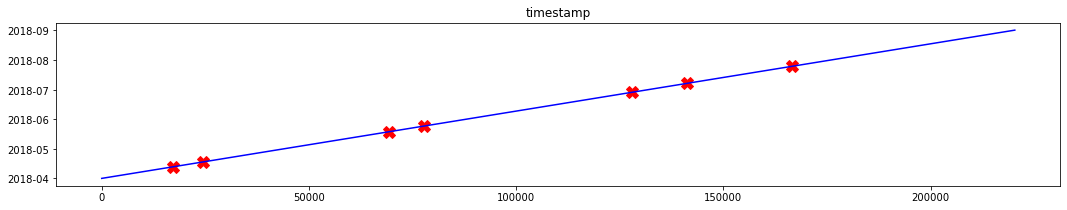

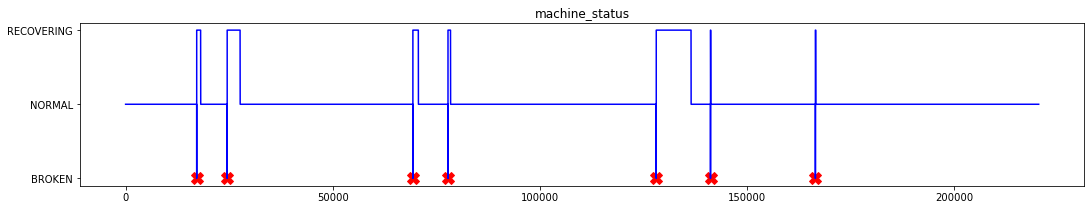

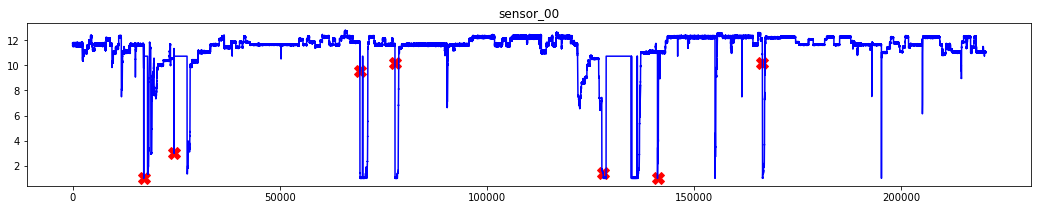

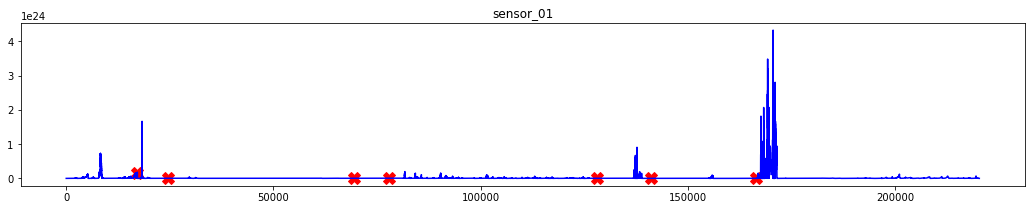

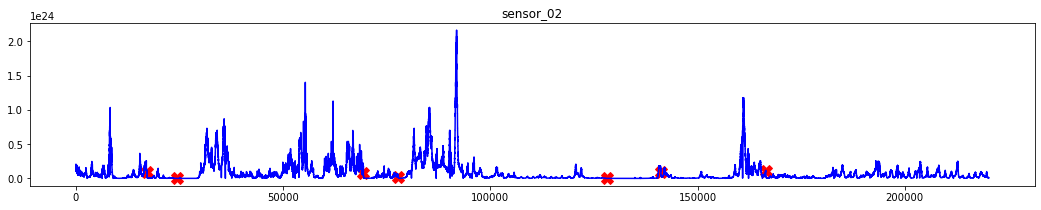

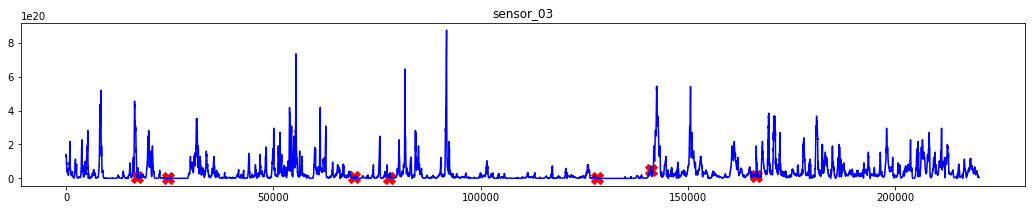

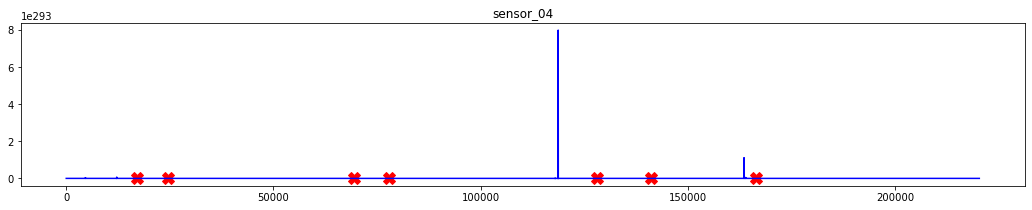

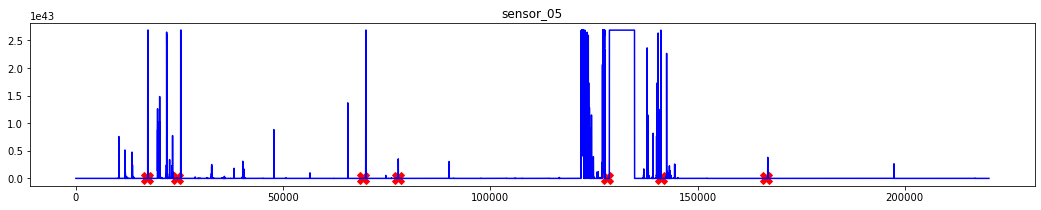

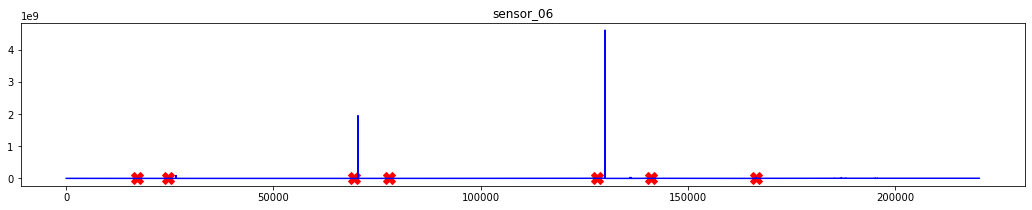

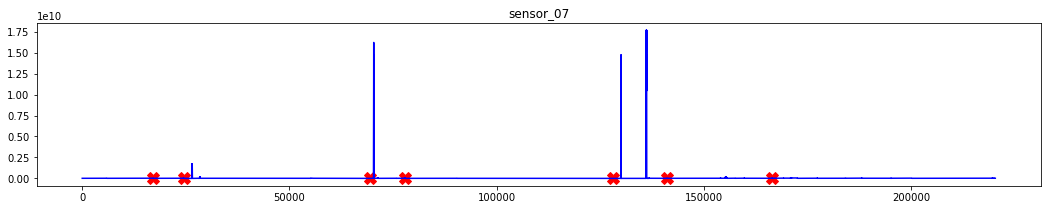

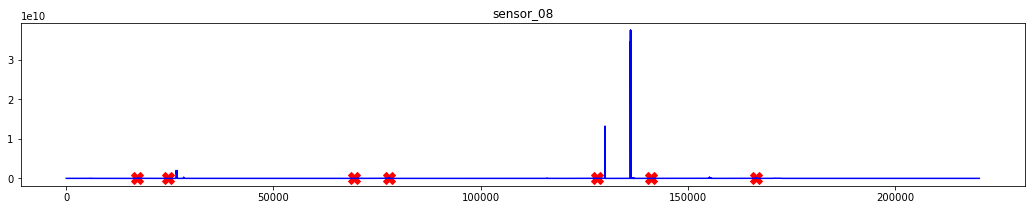

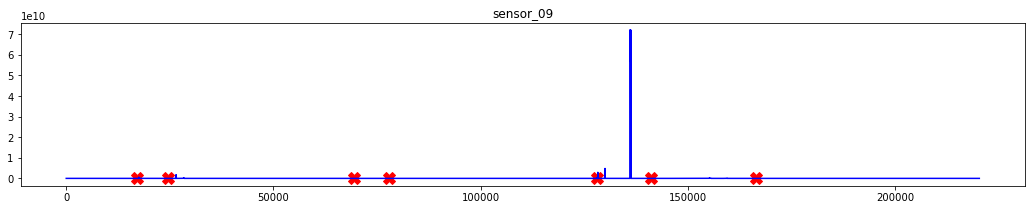

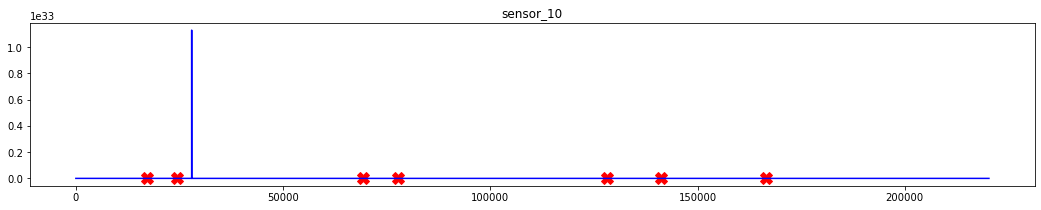

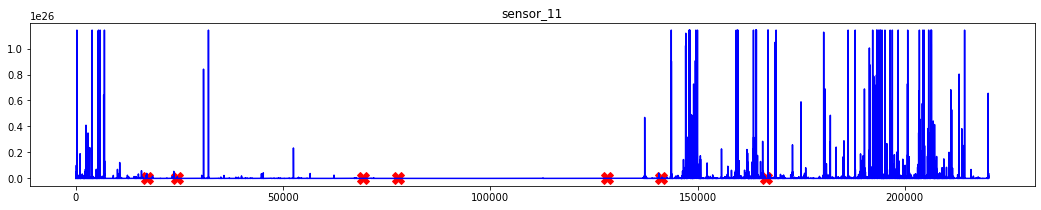

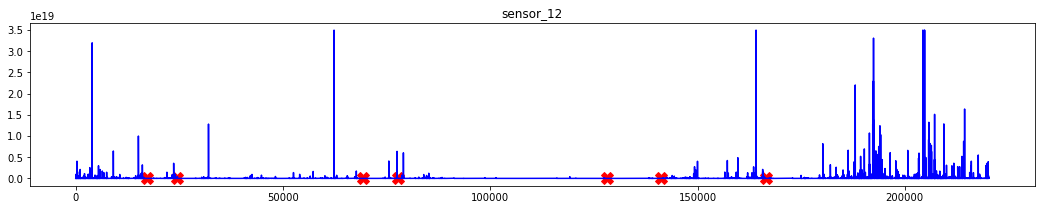

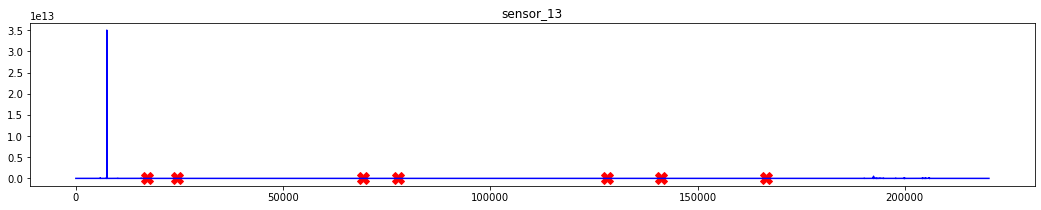

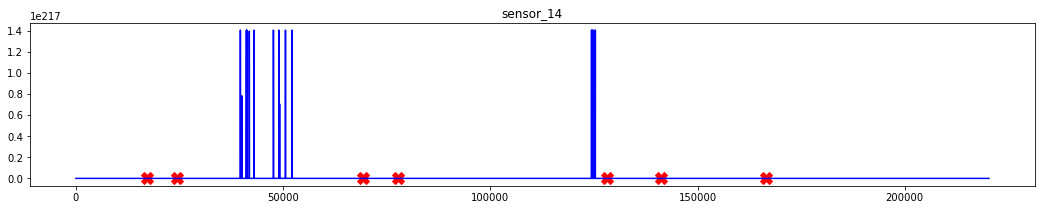

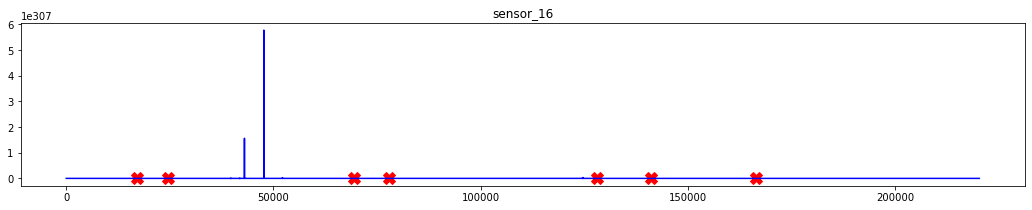

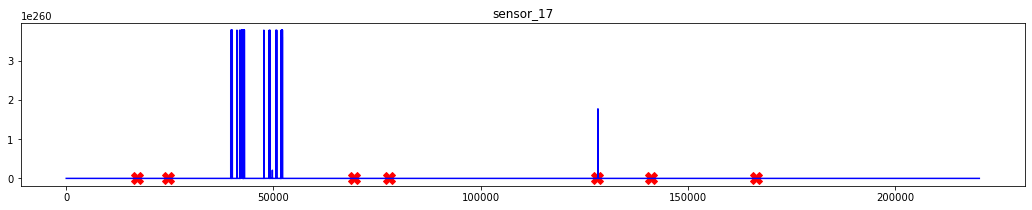

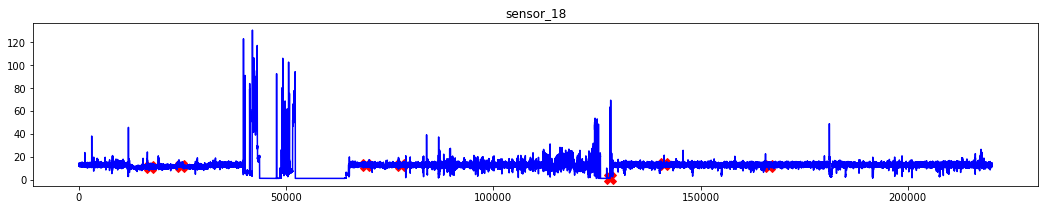

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2450: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


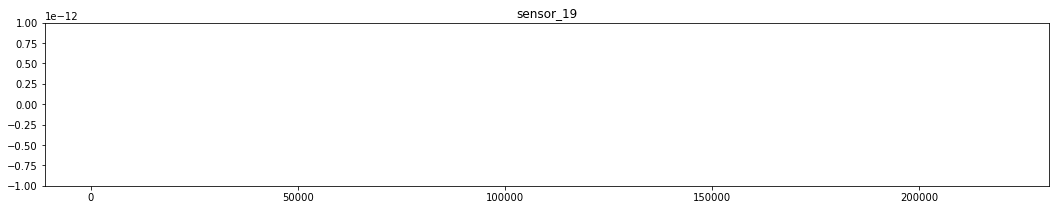

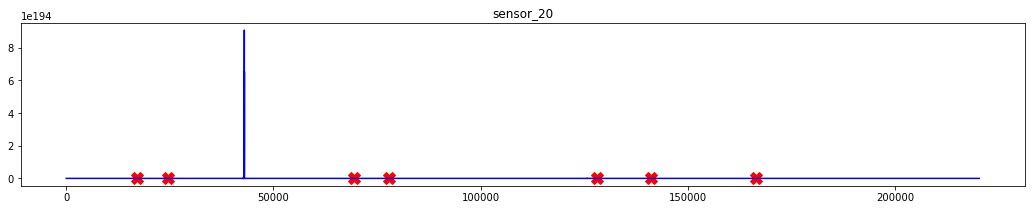

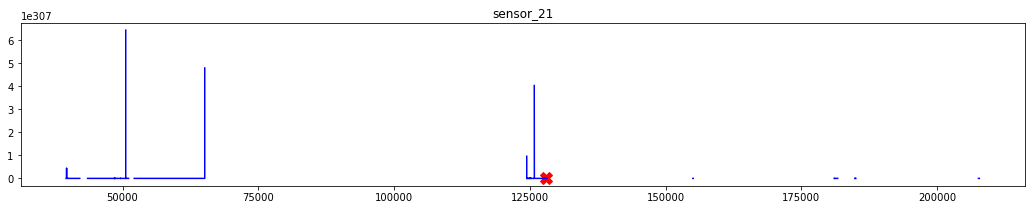

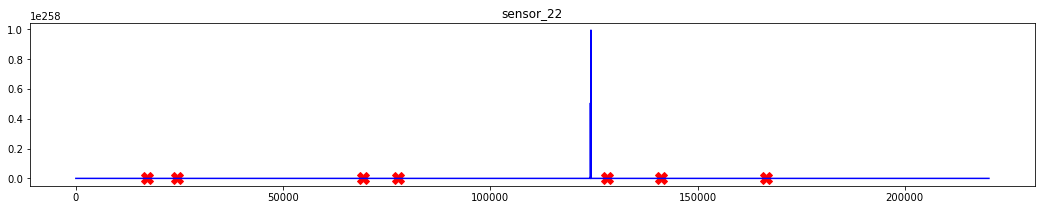

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2161: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


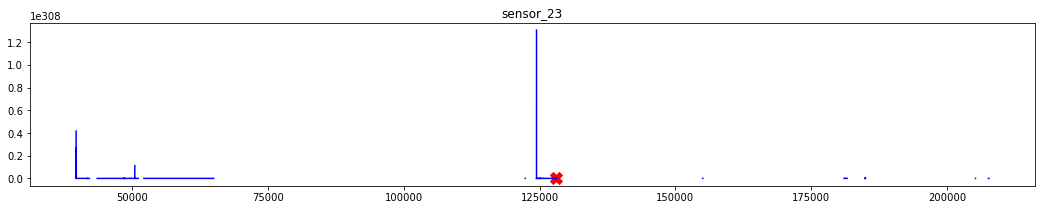

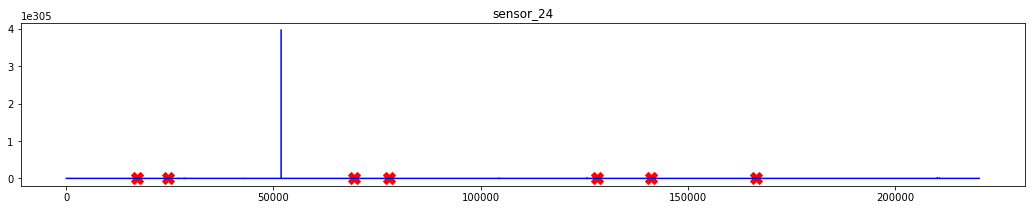

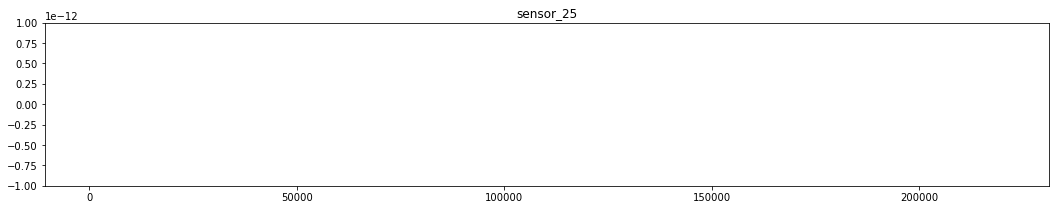

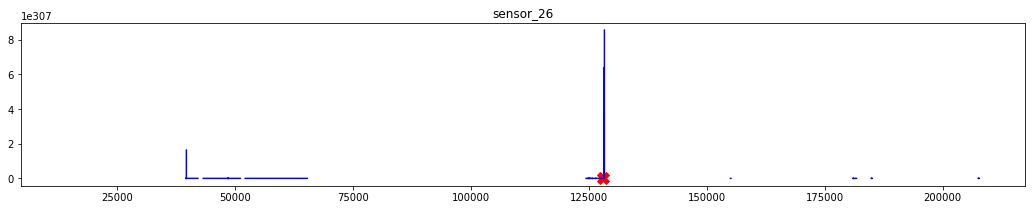

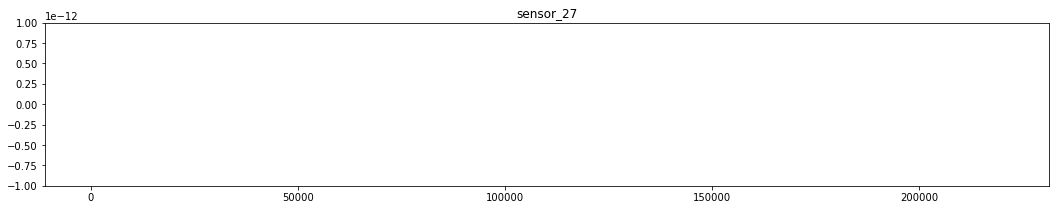

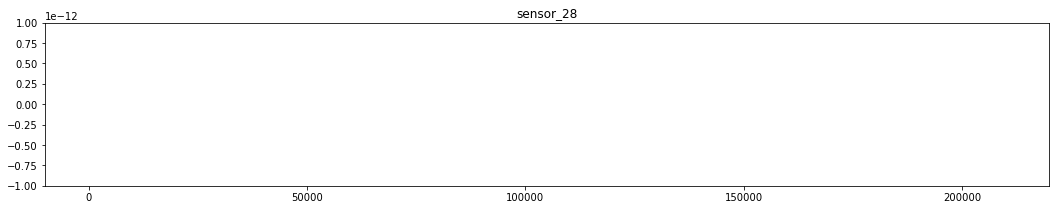

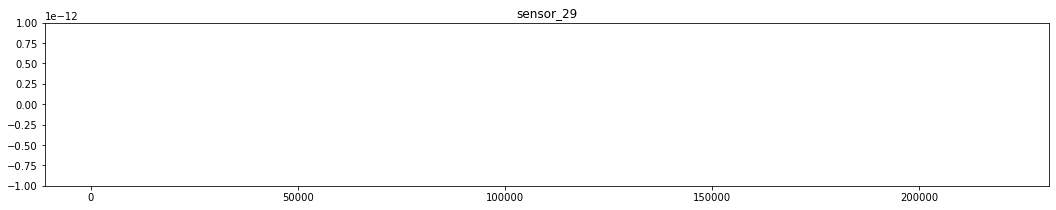

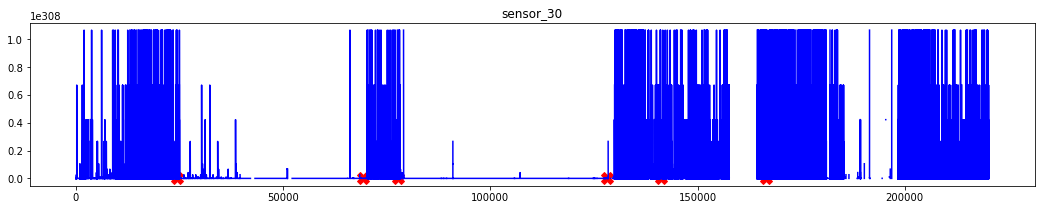

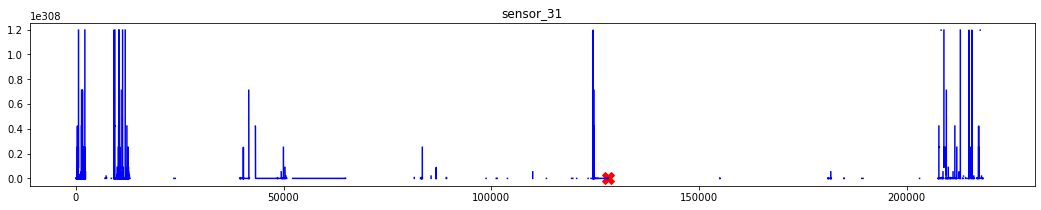

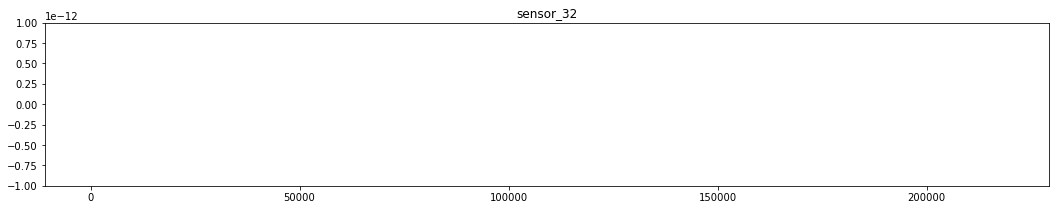

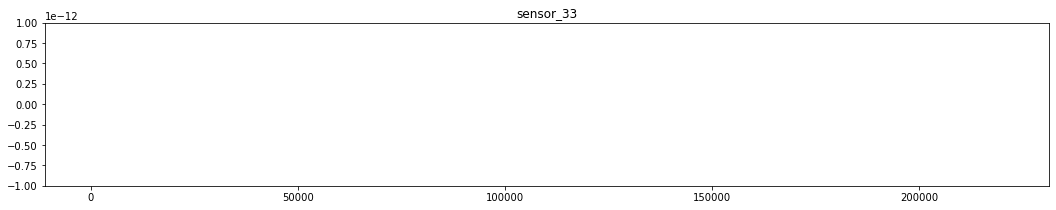

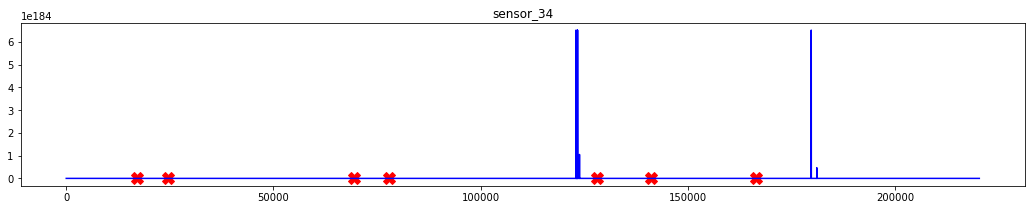

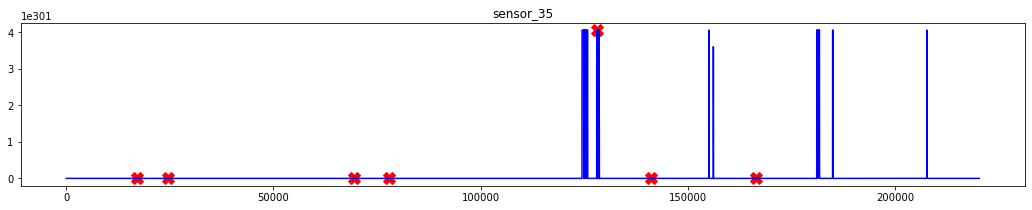

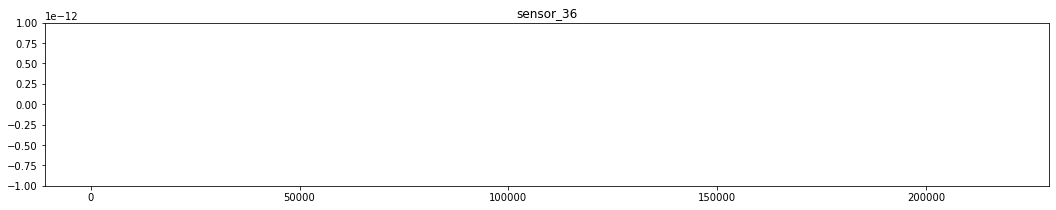

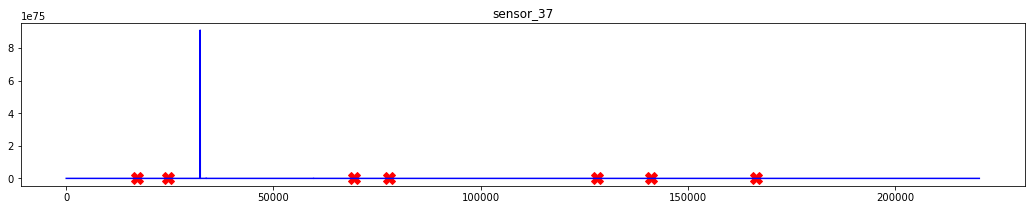

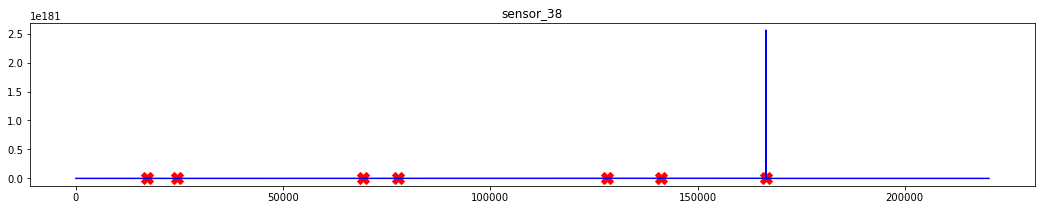

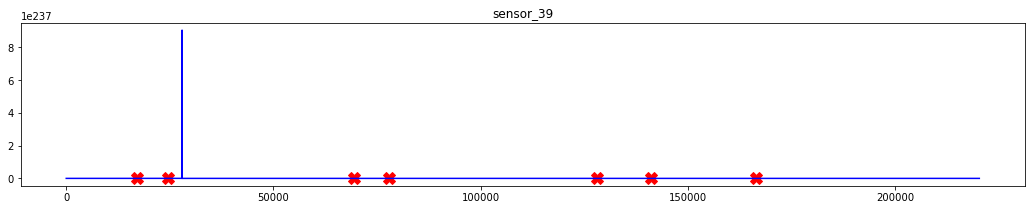

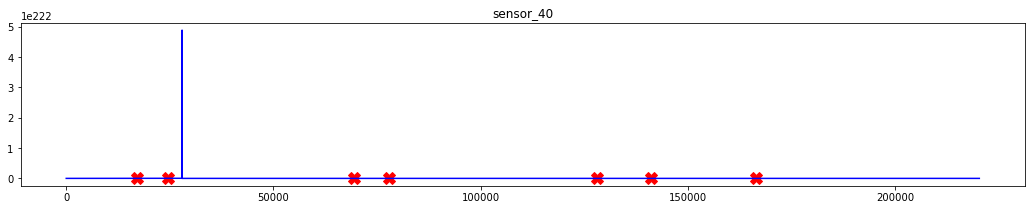

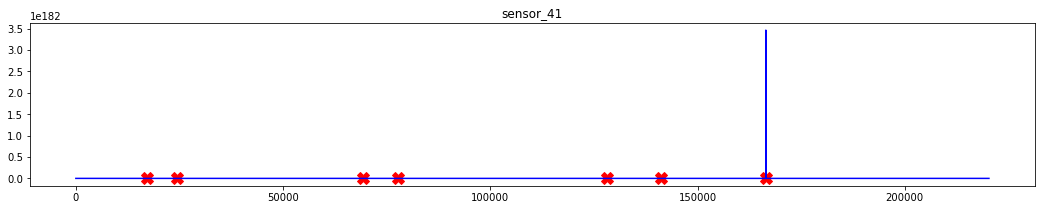

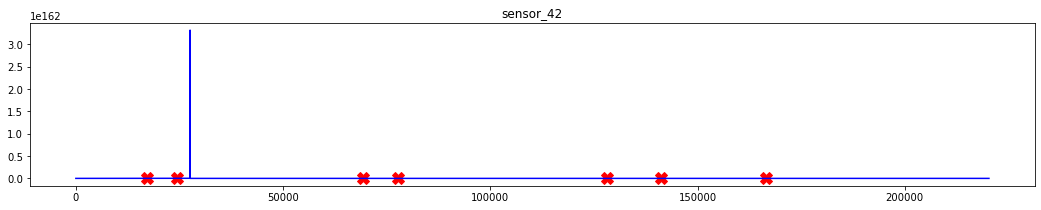

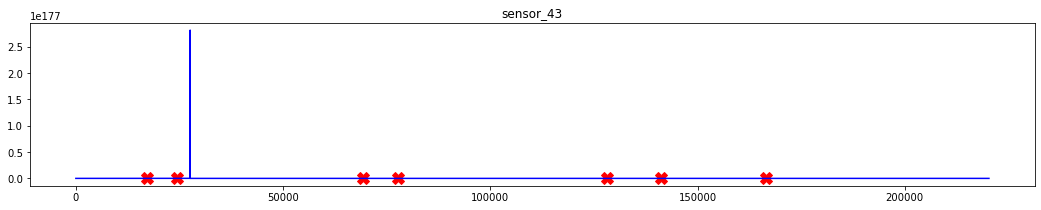

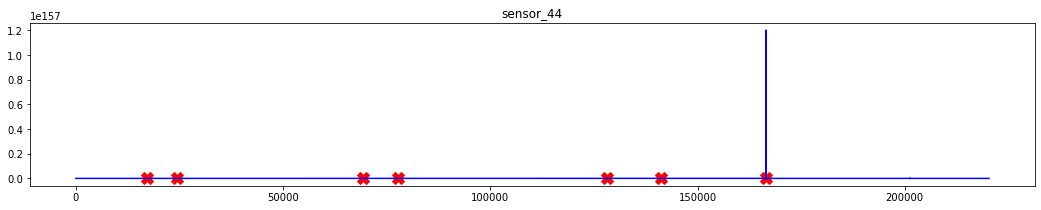

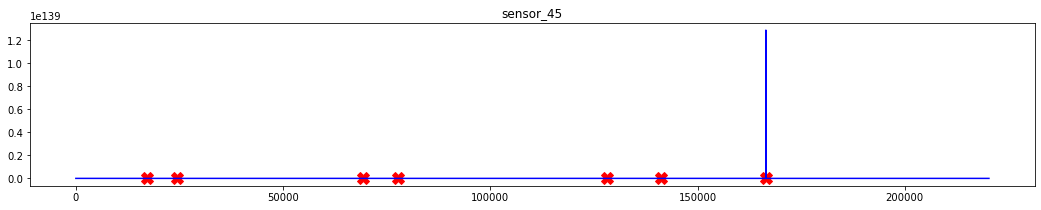

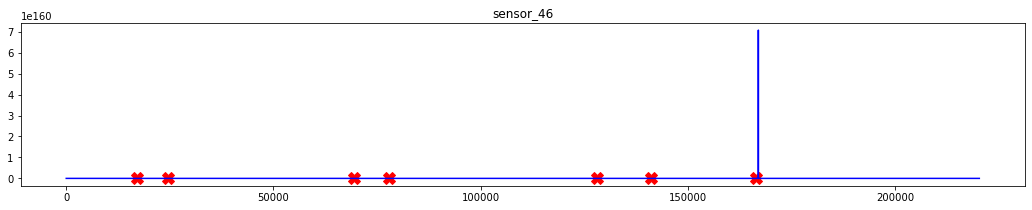

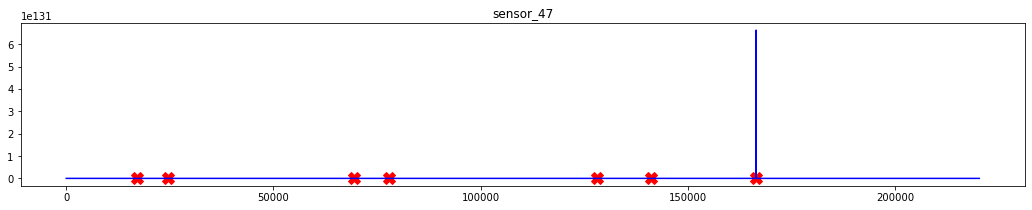

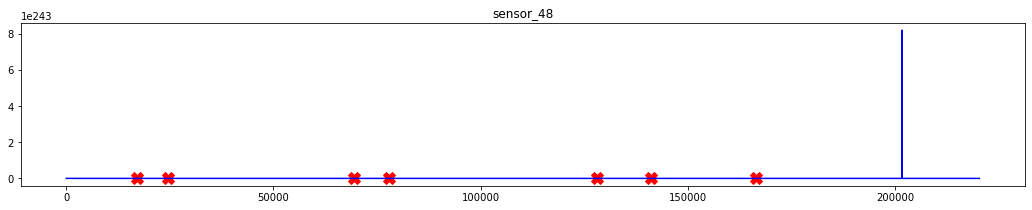

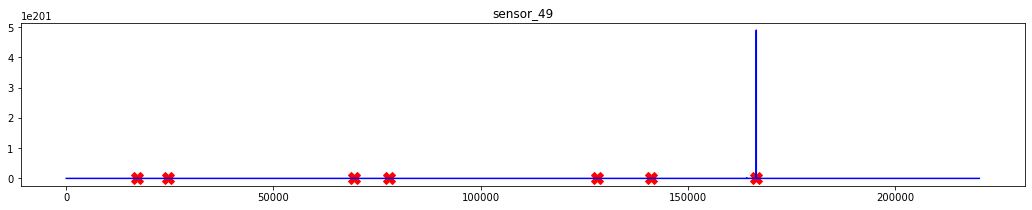

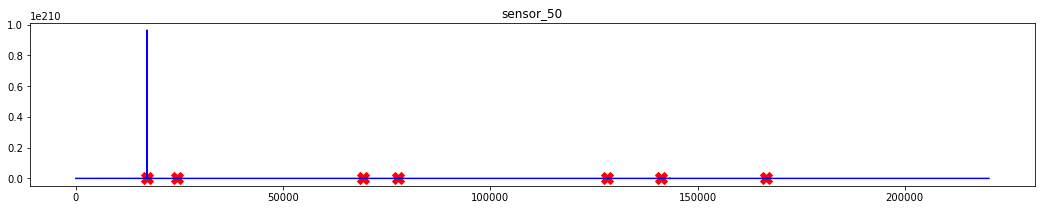

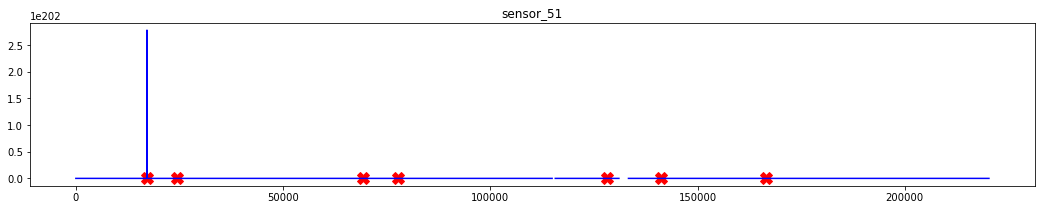

In [7]:
#Clean Data 
#Now EDA
# Extract the readings from the BROKEN state of the pump
broken = df[df['machine_status']=='BROKEN']
# Extract the names of the numerical columns
# df2 = df.drop(['machine_status'], axis=1)
names=df.columns
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()

In [8]:
broken['sensor_00']

17155      1.000000
24510      2.986141
69318      9.571558
77790     10.193589
128040     1.439081
141131     1.001970
166440    10.163552
Name: sensor_00, dtype: float64

In [260]:
df = df.set_index(df['timestamp'])
df = df.drop(columns = ['timestamp', 'machine_status'])
df

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,nor
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,0.231450
2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,0.231450
2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.31940,203.7037,0.180129
2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.45140,203.1250,0.219228
2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.18750,201.3889,0.182573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,183.04926,231.1921,0.087264
2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,183.04926,231.1921,0.070156
2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,183.04926,232.0602,0.060381


In [261]:
names = names.drop('machine_status')
names = names.drop('timestamp')
names

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'nor'],
      dtype='object')

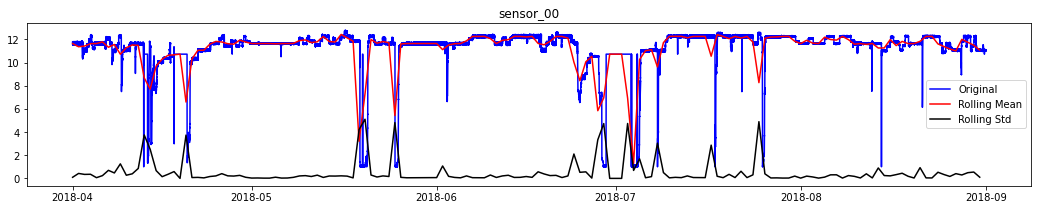

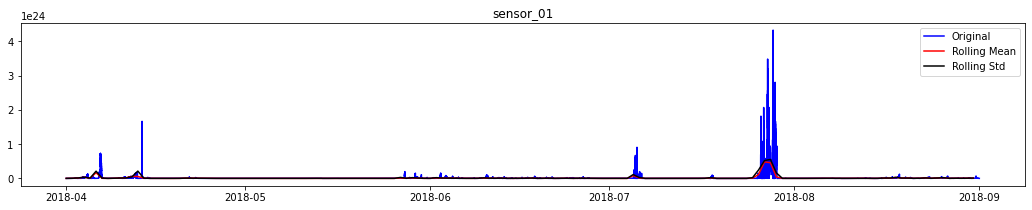

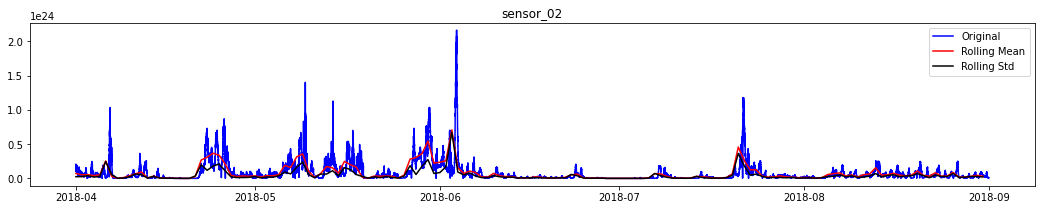

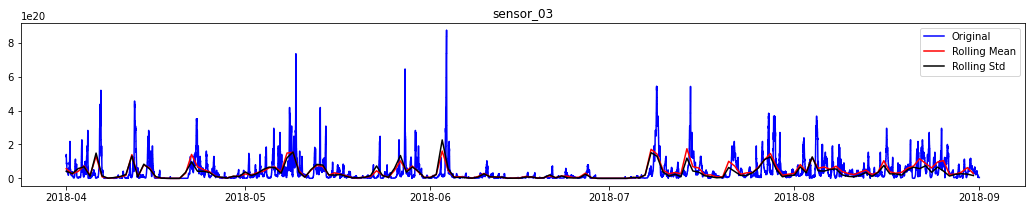

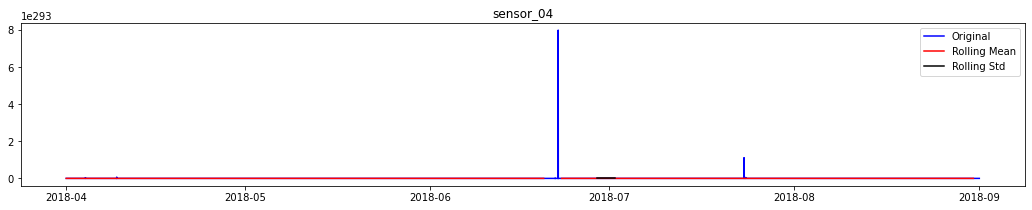

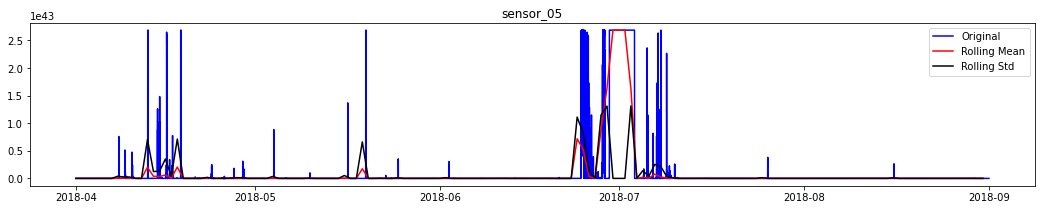

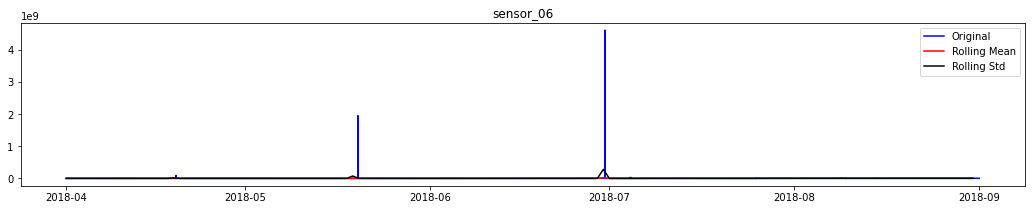

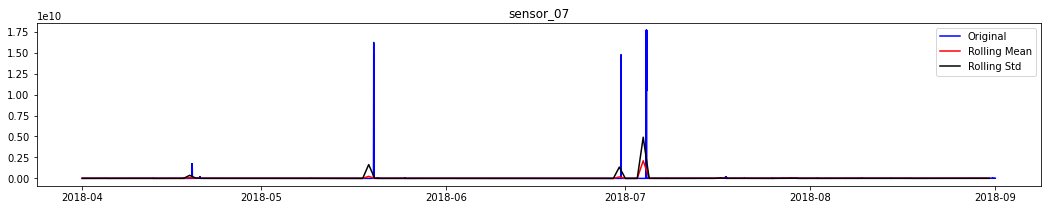

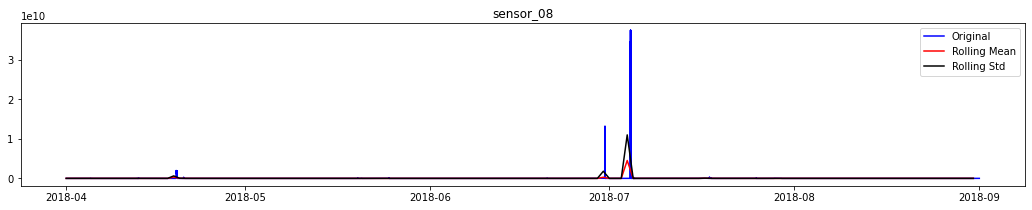

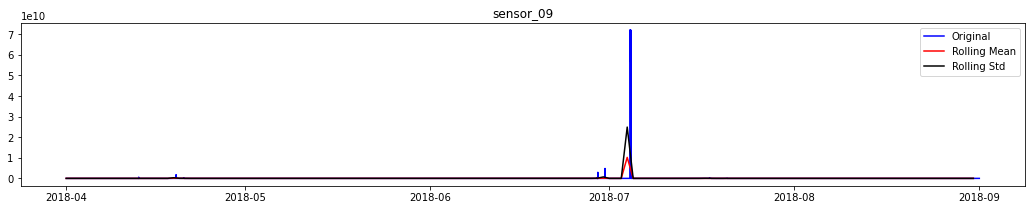

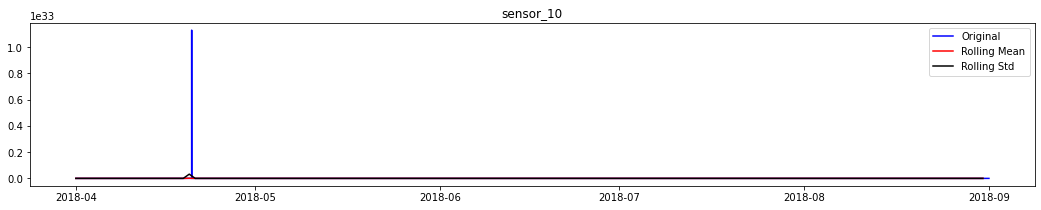

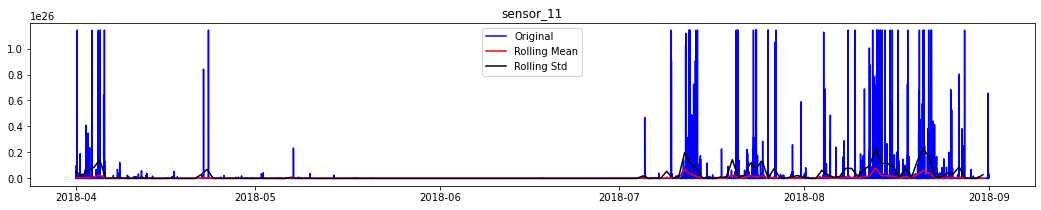

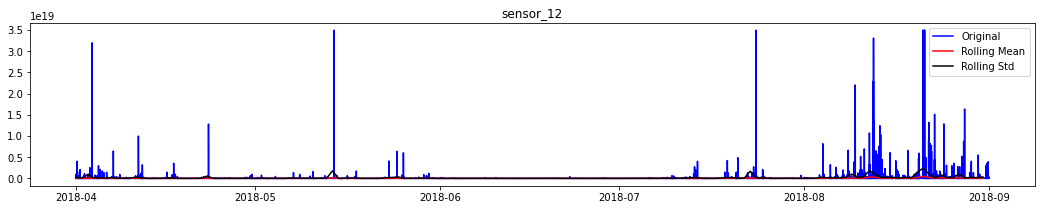

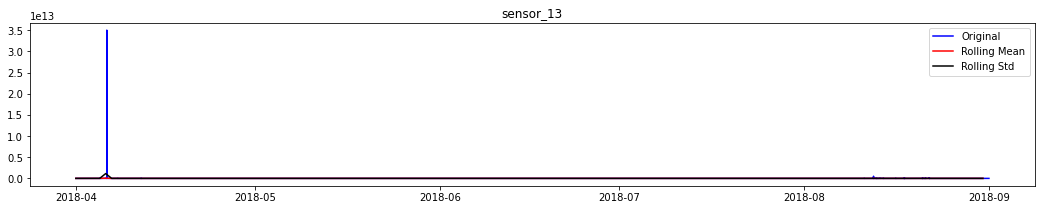

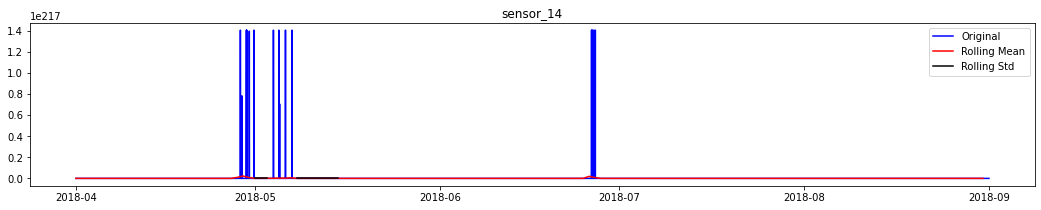

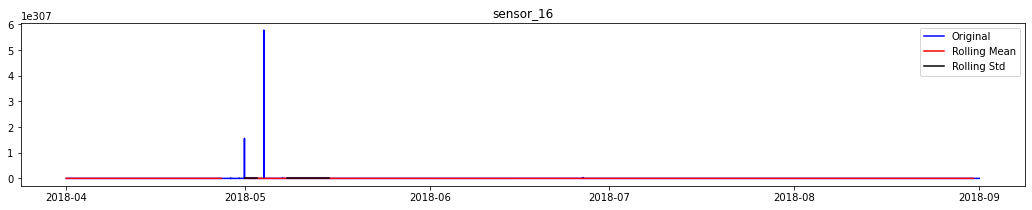

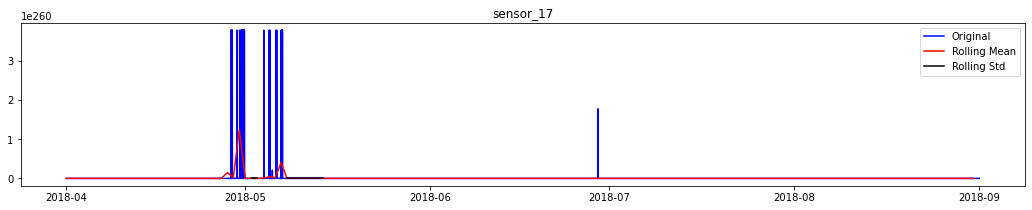

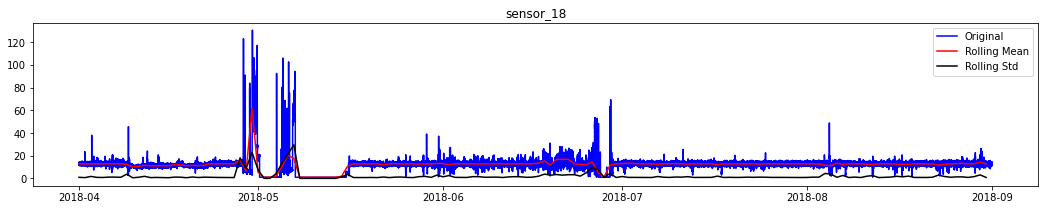

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2450: RuntimeWarning:

overflow encountered in double_scalars



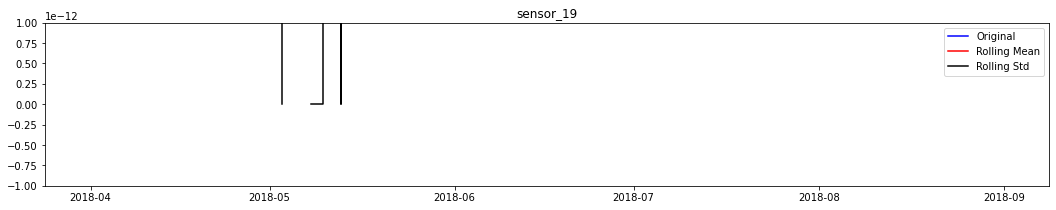

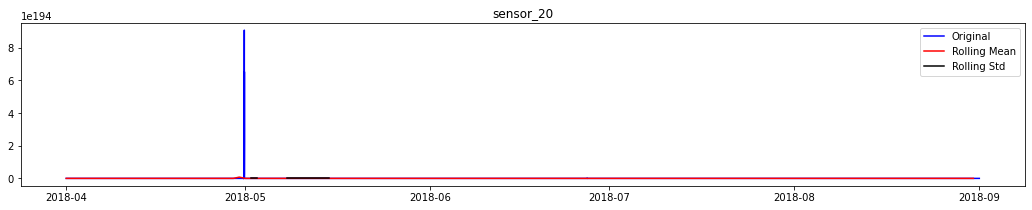

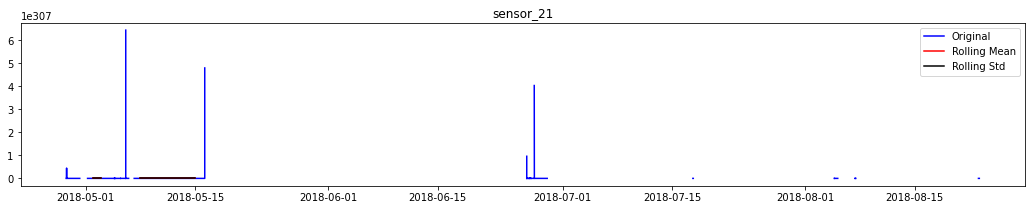

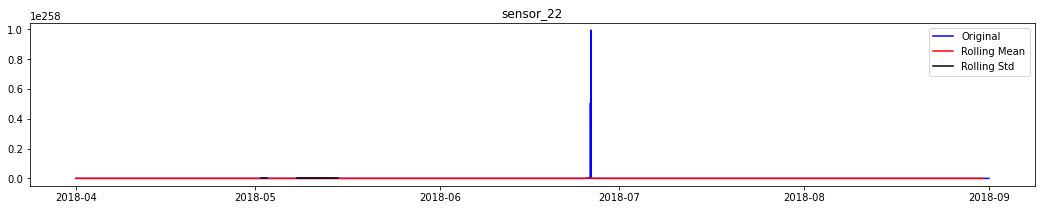

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2161: RuntimeWarning:

overflow encountered in multiply



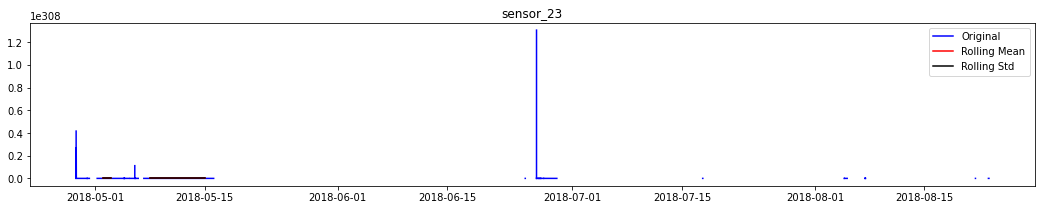

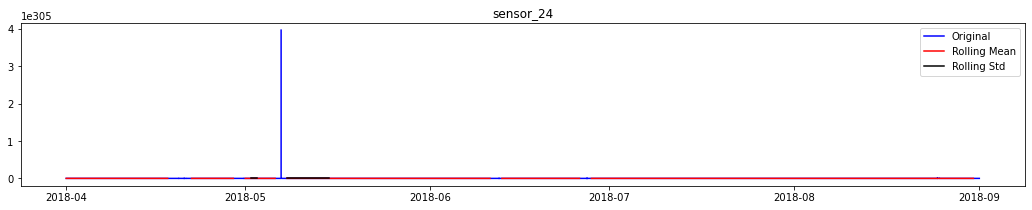

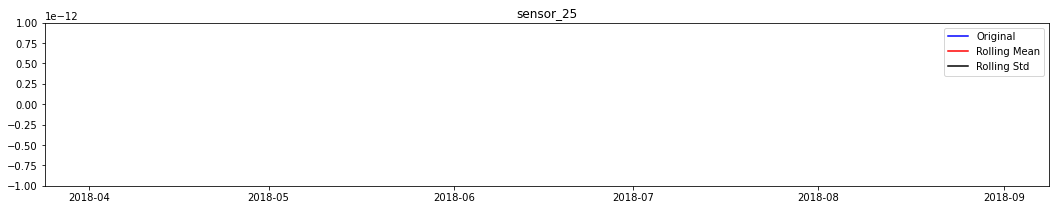

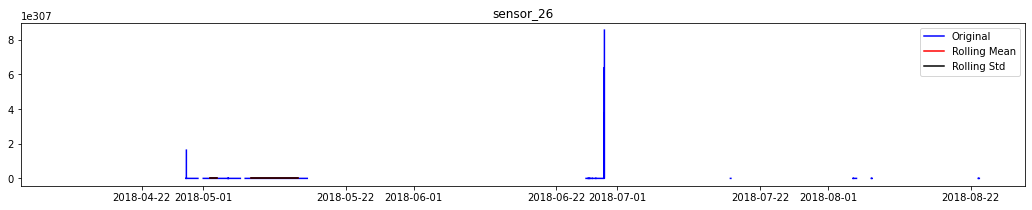

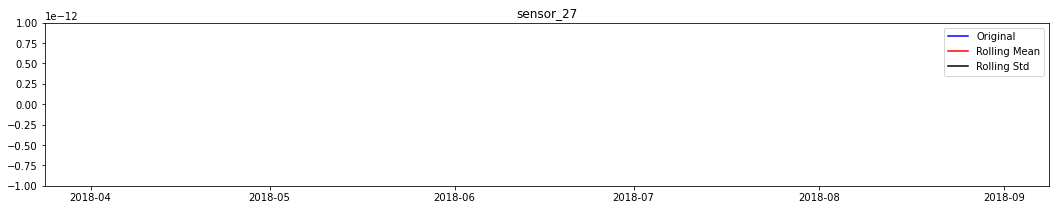

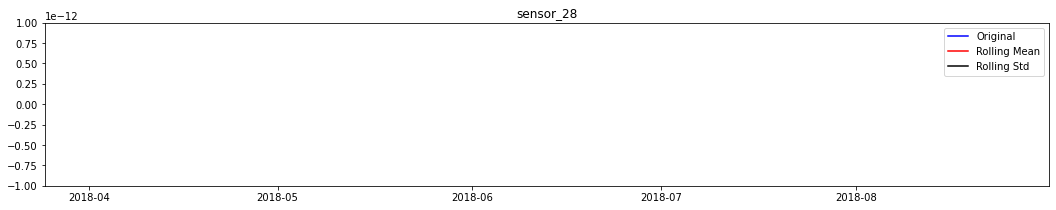

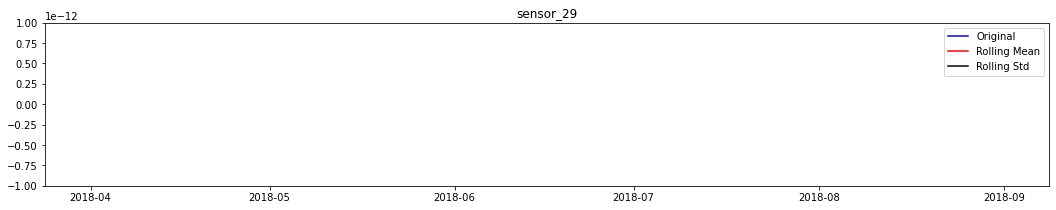

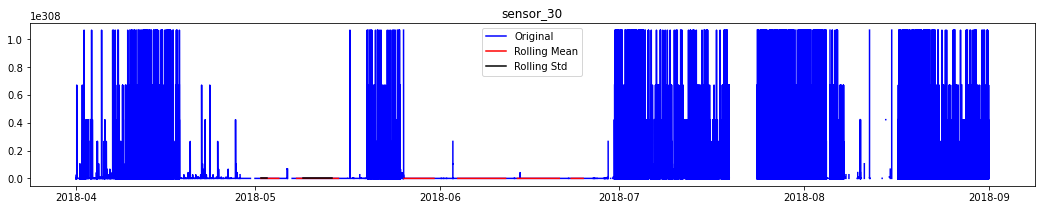

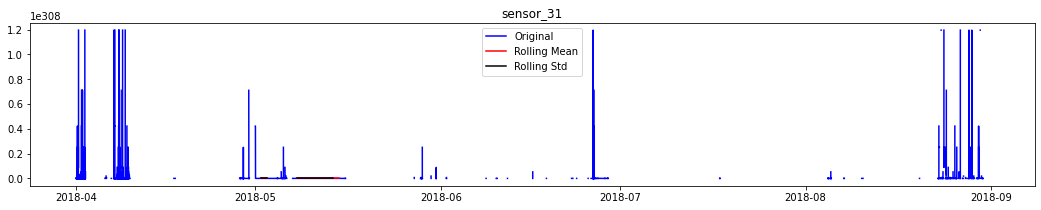

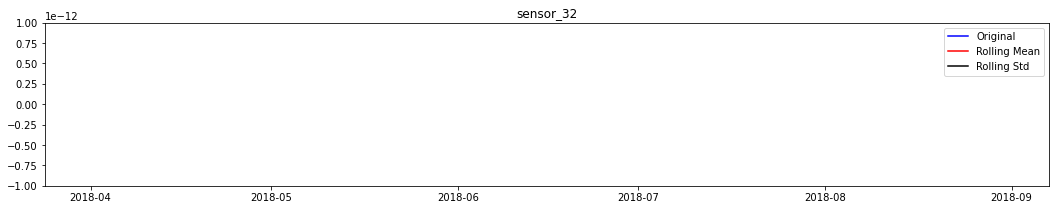

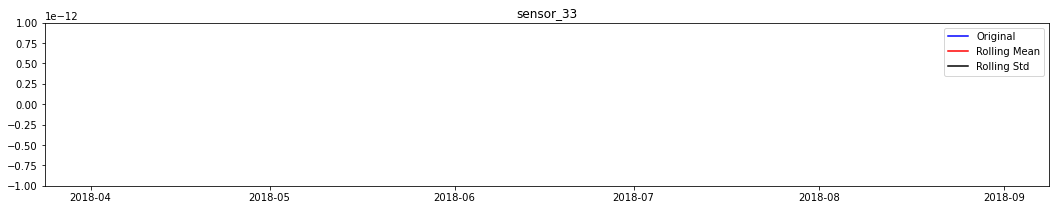

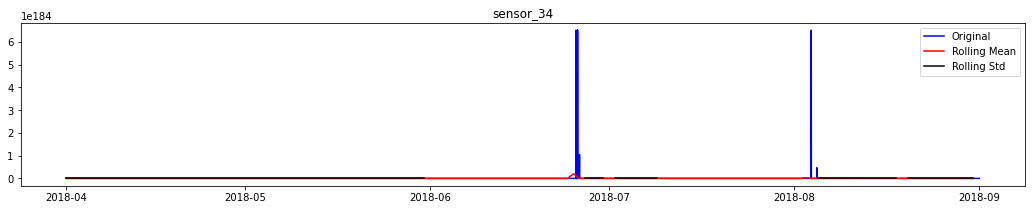

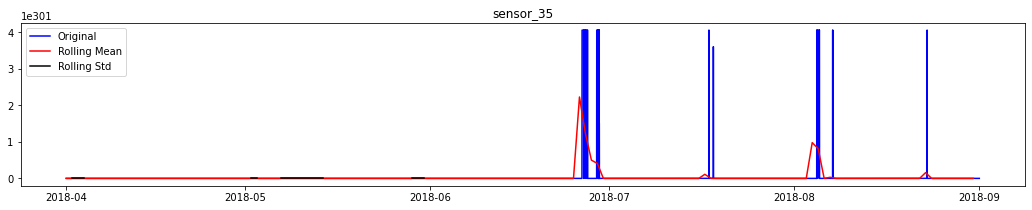

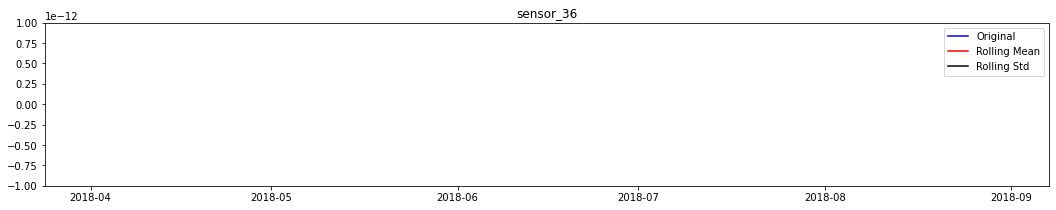

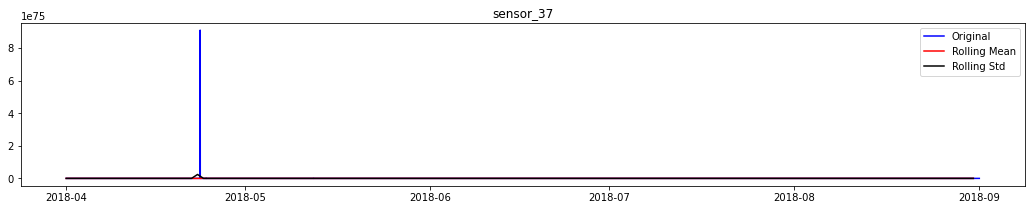

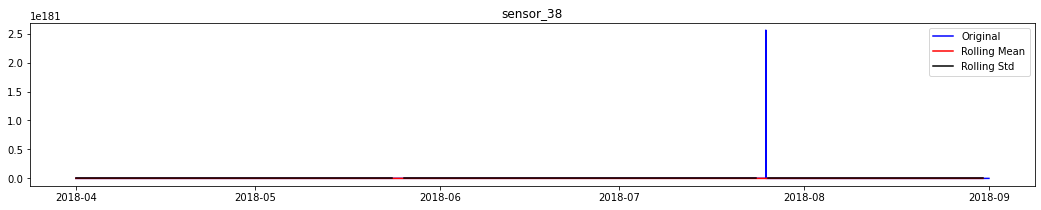

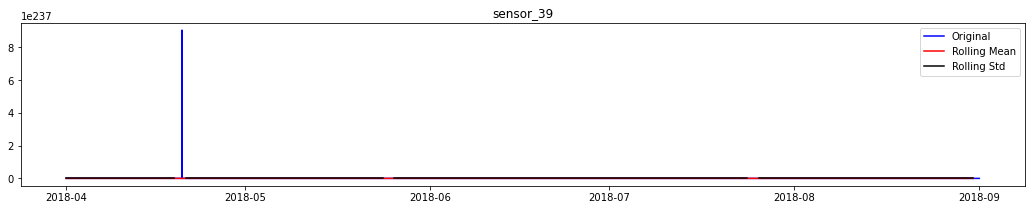

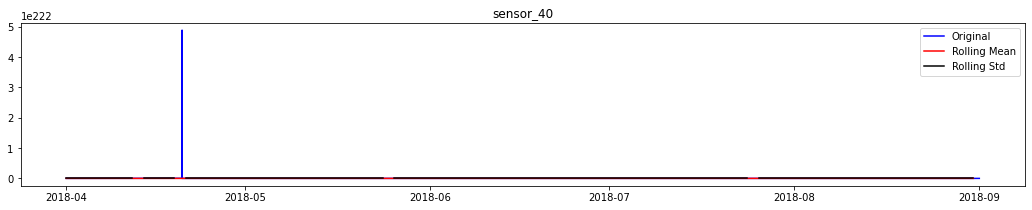

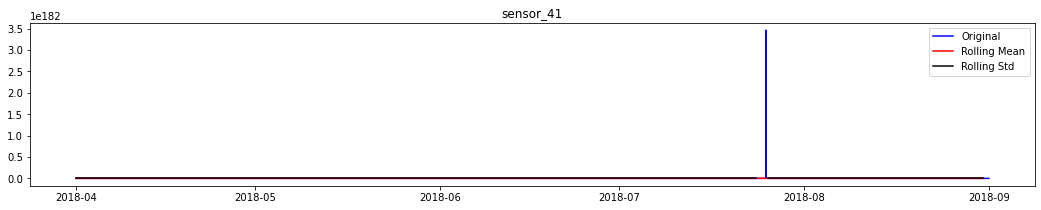

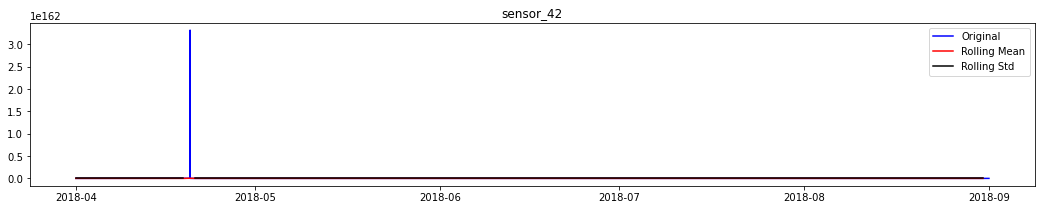

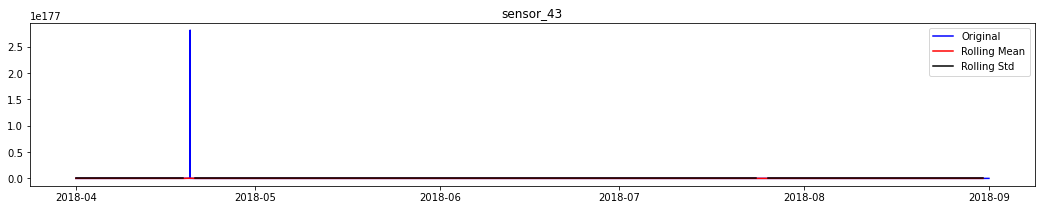

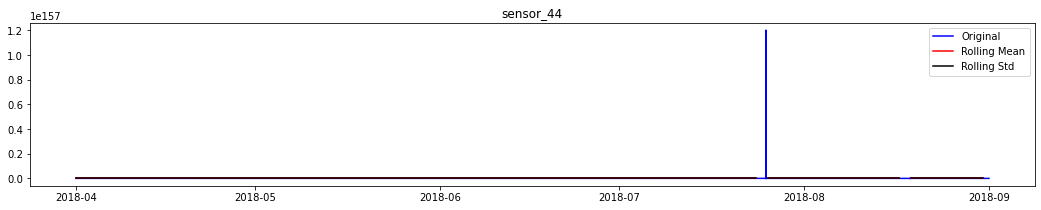

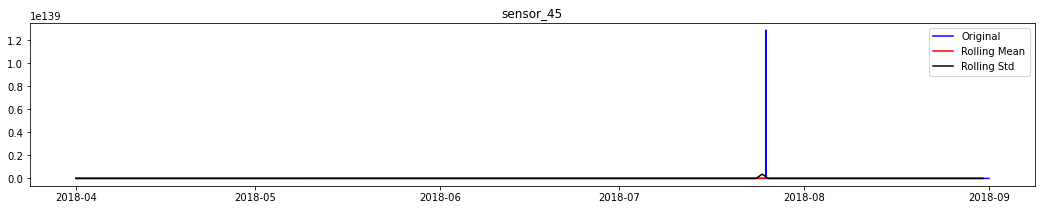

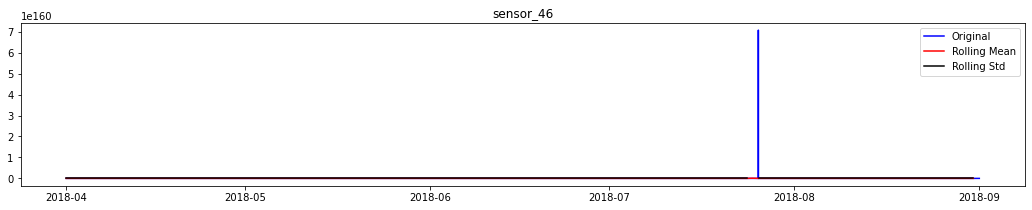

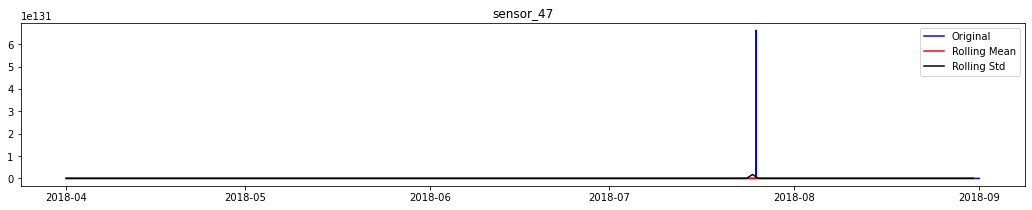

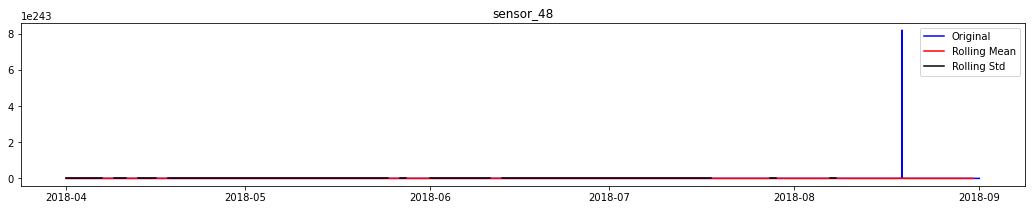

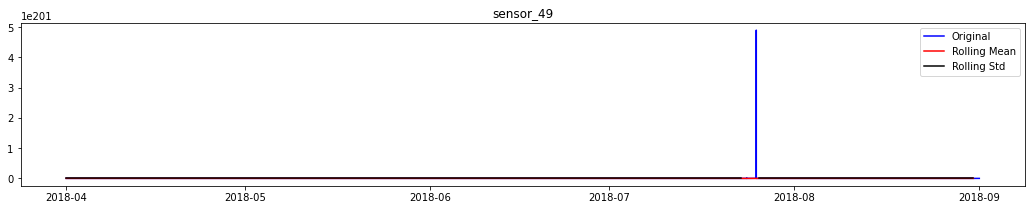

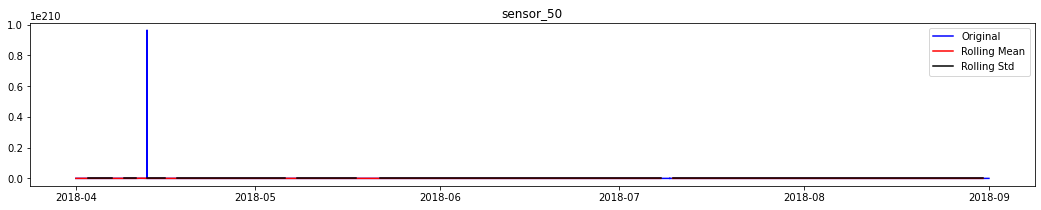

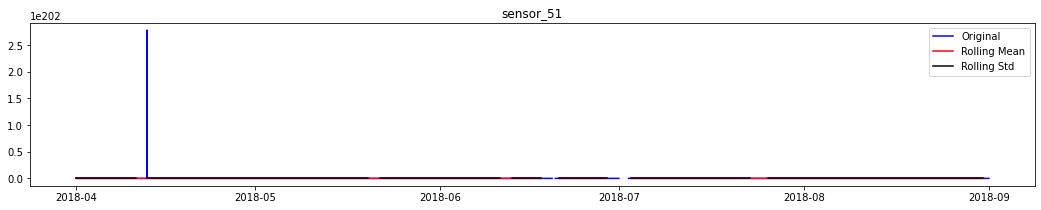

In [236]:
# Resample the entire dataset by daily average
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()
# Plot time series for each sensor with its mean and standard deviation
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

In [262]:
import data_describe as dd
import pandas as pd
from data_describe.anomaly.detection import anomaly_detection
from pmdarima.arima import auto_arima

In [238]:
df

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,11.768118,2.830089e+20,1.287037e+23,1.295709e+20,3.203037e+275,1.607117e+33,6.676104e+05,1.013353e+07,5.763929e+06,3.448776e+06,...,6.279095e+13,1.616961e+18,1.644199e+17,3.355120e+28,1.308731e+22,3.869319e+16,4.097240e+68,2.543071e+29,3.611652e+105,2.897931e+87
2018-04-01 00:01:00,11.768118,2.830089e+20,1.287037e+23,1.295709e+20,3.203037e+275,1.607117e+33,6.676104e+05,1.013353e+07,5.763929e+06,3.448776e+06,...,6.279095e+13,1.616961e+18,1.644199e+17,3.355120e+28,1.308731e+22,3.869319e+16,4.097240e+68,2.543071e+29,3.611652e+105,2.897931e+87
2018-04-01 00:02:00,11.527483,3.671969e+20,1.287037e+23,1.413216e+20,2.923639e+277,8.721944e+31,6.120994e+05,9.224098e+06,6.063332e+06,3.302301e+06,...,6.279082e+13,1.246237e+18,1.231097e+17,2.512146e+28,1.747888e+22,3.869330e+16,5.405402e+67,1.425699e+29,6.363320e+104,2.933546e+88
2018-04-01 00:03:00,11.710361,2.830089e+20,1.232375e+23,1.413213e+20,6.183316e+272,2.728282e+33,6.076899e+05,1.137706e+07,6.565505e+06,3.550042e+06,...,4.839512e+13,5.705687e+17,9.217819e+16,1.408362e+28,1.747888e+22,3.869319e+16,5.405402e+67,1.067492e+29,2.671260e+104,1.644624e+88
2018-04-01 00:04:00,11.538832,2.955619e+20,1.287037e+23,1.413213e+20,2.572336e+276,1.828804e+33,6.300724e+05,1.097291e+07,6.565505e+06,3.550042e+06,...,4.839512e+13,9.605188e+17,6.901843e+16,1.880951e+28,3.117739e+22,6.901843e+16,5.472380e+68,7.992850e+28,1.515985e+105,2.897931e+87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:55:00,11.104495,5.196307e+20,8.728059e+21,5.451163e+18,4.532748e+275,1.125883e+28,3.680761e+06,1.705920e+07,6.286594e+06,3.844061e+06,...,1.316167e+13,4.220225e+16,4.536076e+29,5.561167e+22,9.679964e+20,6.986735e+17,1.727148e+92,5.339777e+66,3.142561e+79,2.543626e+100
2018-08-31 23:56:00,11.028281,5.196306e+20,9.115288e+21,5.451163e+18,9.944709e+273,3.901056e+28,3.816331e+06,1.794532e+07,6.286594e+06,3.680761e+06,...,1.014417e+13,4.220225e+16,1.067492e+29,9.799027e+21,7.247874e+20,5.231319e+17,7.338771e+92,7.219594e+67,3.142561e+79,2.543626e+100
2018-08-31 23:57:00,10.984970,5.196306e+20,8.728059e+21,5.451163e+18,6.857501e+271,1.681157e+29,3.575802e+06,1.794532e+07,6.565505e+06,3.680761e+06,...,1.316167e+13,9.217819e+16,2.512146e+28,1.726633e+21,7.247874e+20,5.231319e+17,2.363636e+94,3.030413e+67,3.142561e+79,6.059884e+100


In [267]:
a = df2[17000:18000]
# broken['sensor_13']
# df2.iloc[17144:17156][['sensor_13','timestamp']]

In [186]:
auto_arima_args = {
    "start_p": 1,
    "start_q": 2,
    "max_p": 2,
    "max_q": 2,
    "m": 2,
    "start_P": 0,
    "seasonal": True,
    "d": 2,
    "D": 2,
    "trace": True,
    "error_action": "ignore",
    "suppress_warnings": True,
    "stepwise": True,
}
, **auto_arima_args

In [264]:
widget = anomaly_detection(a,target = a['sensor_00'],
                  date_col = "timestamp", n_periods=7, time_split_index=20, 
                           sigma=3.5)

KeyError: 'nor'

In [241]:
widget.show(viz_backend = 'plotly')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



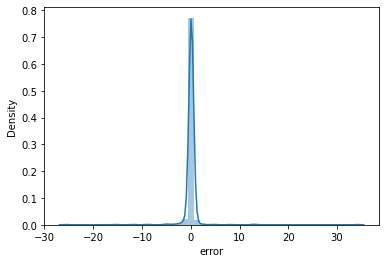

In [164]:
import seaborn as sns 

sns.distplot(widget.viz_data.error)

In [158]:
widget.viz_data.iloc[20:200]

,actuals,predictions,error,percentage_change,meanval,deviation,-3s,3s,-2s,2s,-1s,1s,impact,color,region,anomaly_points
timestamp,,,,,,,,,,,,,,,,
2018-04-13 11:39:00,0.000000,0.000000,0.000000,NaN,-2.230359e-17,0.013206,-0.026411,0.026411,-0.023110,0.023110,-0.019809,0.019809,4,0,POSITIVE,NaN
2018-04-13 11:38:00,0.000000,0.000000,0.000000,NaN,-2.230359e-17,0.013206,-0.026411,0.026411,-0.023110,0.023110,-0.019809,0.019809,4,0,POSITIVE,NaN
2018-04-13 11:37:00,0.000000,0.022873,-0.022873,-inf,-2.230359e-17,0.013206,-0.026411,0.026411,-0.023110,0.023110,-0.019809,0.019809,2,1,NEGATIVE,NaN
2018-04-13 11:36:00,0.022873,0.000000,0.022873,100.0,3.267556e-03,0.008645,-0.014023,0.020558,-0.011861,0.018397,-0.009700,0.016235,7,3,POSITIVE,0.022873
2018-04-13 11:35:00,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,POSITIVE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-13 08:44:00,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,POSITIVE,NaN
2018-04-13 08:43:00,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,POSITIVE,NaN
2018-04-13 08:42:00,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,POSITIVE,NaN


In [351]:
A = [1, 3, 6, 4, 1, 2]
B = [1, 3, 6, 4, 1, 2]

In [374]:
def solution(A):
    A.sort()
    for i in range(len(A)-1):
        if (A[i] <0):
            return 1
        elif ((A[i+1]-A[i])>1):
            return(A[i]+1)
        elif ((A[i+1]-A[i]) == 1):
            return (A[len(A)-1])
#             print(A[i+1]+1)

In [375]:
solution(A)

6

In [ ]:
Example test:   [1, 3, 6, 4, 1, 2]
WRONG ANSWER (got 4 expected 5)

Example test:   [1, 2, 3]
OK

Example test:   [-1, -3]
OK

In [386]:
def sol(A):
    lst = []
    k = A[0]
    lst.append(k)
    lst.append(A[k])
    k = A[k]
    lst.append(A[k])
    return lst

In [387]:
A = [1,4,-1,3,2]

In [388]:
sol(A)

[1, 4, 2]

In [435]:
class Node: 
    def __init__(self, arr): 
        self.arr = arr  
        self.next = None 
  
class LinkedList: 
    def __init__(self): 
        self.head = None
  
    def push(self, nums): 
        new_node = Node(nums) 
        new_node.next = self.head 
        self.head = new_node 

    def Length(self): 
        temp = self.head  
        count = 0  

        while (temp): 
            count += 1
            temp = temp.next
        return count 

def sol(A):
    llist = LinkedList() 
    for i in range(len(A)):
        if (A[i] != -1):
            llist.push(A[i])

    return llist.Length()

In [436]:
A = [1,4,-1,3,2]
sol(A)

4

In [1039]:
A = [6,1,4,6,3,2,7,4]
B = [10,19,15]

In [1040]:
def solution(A,K,L):
    if (len(A) < K+L):
        return -1
    else:
        l = []
        trees = []
        for i in range(len(A)-K+1):
            l.append(sum(A[i:(i+K)]))
            trees.append(A[i:(i+K)])
        if (l[i] == max(l)):
            alice = trees[i]
        for k in range(len(A)):
            
            del trees[i:(i+K)]
            del l[i:(i+K)]
            
        l2 = []
        trees2 = []
        for k in range(len(A)-J+1):
            l2.append(sum(A[k:(i+J)]))
            trees2.append(A[k:(i+J)])
        if (l[k] == max(l)):
            bob = trees[k]
                    
                    
            a = sum(alice)
            b = sum(bob)
            sl = [a,b]
            return sum(sl)

In [1041]:
solution(A,3,2)

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [797]:
    for i in trees:
        newA = A.remove(i)
        return newA
    
            for j in range(len(alice)):
            return alice[j]
# #         newA = A.remove(alice[j])
# #         return newA

IndentationError: unexpected indent (<ipython-input-797-46c337712571>, line 5)

In [671]:
def solution(A,K):
    l = []
    trees = []
    for i in range(len(A)-K+1):
        l.append(sum(A[i:(i+K)]))
        trees.append(A[i:(i+K)])
    if (l[i] == max(l)):
        alice = trees[i]
        newA = A.remove(alice[0])

In [672]:
solution(A,3)

In [1087]:
A = [6,1,4,6,3,2,7,4]
B = [10,19,15]

In [1088]:
def solution(A,K,L):
    if (len(A) < K+L):
        return -1
    else:
        l = []
        trees = []
        for i in range(len(A)-K+1):
            l.append(sum(A[i:(i+K)]))
            trees.append(A[i:(i+K)])
        if (l[i] == max(l)):
            alice = trees[i]
            del A[i:(i+K)]
        l2 = []
        trees2 = []
        l2.append(sum(A[i:(i+L)]))
        trees2.append(A[i:(i+L)])
        return l2
        if (l[i] == max(l2)):
            bob = trees2[i]
            a = sum(alice)
            b = sum(bob)
            sl = [a,b]
            return sum(sl)

In [1089]:
solution(A,3,2)

[0]

In [1057]:
value

[7]

In [ ]:
            a = sum(alice)
            b = sum(bob)
            sl = [a,b]
            return sum(sl)